In [1]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt

# Set image size (InceptionResNetV2 prefers 299x299 images)
IMAGE_SIZE = [299, 299]  

# Define dataset paths
train_path = '../Datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../Datasets/New Plant Diseases Dataset(Augmented)/valid'

# Load InceptionResNetV2 pre-trained model (without the top layers)
inception_resnet = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in inception_resnet.layers:
    layer.trainable = False

# Get the number of output classes
folders = glob(train_path + '/*')

# Add custom layers
x = Flatten()(inception_resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=inception_resnet.input, outputs=prediction)

# Display model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [2]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preprocessing for validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Epoch 1/10
574/574 [==============================] - 2550s 4s/step - loss: 4.0991 - accuracy: 0.7108 - val_loss: 3.3296 - val_accuracy: 0.7876
Epoch 2/10
574/574 [==============================] - 3320s 6s/step - loss: 2.7834 - accuracy: 0.8277 - val_loss: 2.8630 - val_accuracy: 0.8362
Epoch 3/10
574/574 [==============================] - 2951s 5s/step - loss: 2.6168 - accuracy: 0.8587 - val_loss: 2.7520 - val_accuracy: 0.8643
Epoch 4/10
574/574 [==============================] - 21289s 37s/step - loss: 2.2719 - accuracy: 0.8806 - val_loss: 1.7941 - val_accuracy: 0.9023
Epoch 5/10
574/574 [==============================] - 2743s 5s/step - loss: 1.9053 - accuracy: 0.9011 - val_loss: 2.6870 - val_accuracy: 0.8779
Epoch 6/10
574/574 [==============================] - 2401s 4s/step - loss: 1.9631 - accuracy: 0.9078 - val_loss: 2.6036 - val_accuracy: 0.8838
Epoch 7/10
574/574 [===========================

In [3]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

144/144 [==============================] - 537s 4s/step - loss: 2.6831 - accuracy: 0.9032
Validation Loss: 2.6830835342407227
Validation Accuracy: 0.9031624794006348


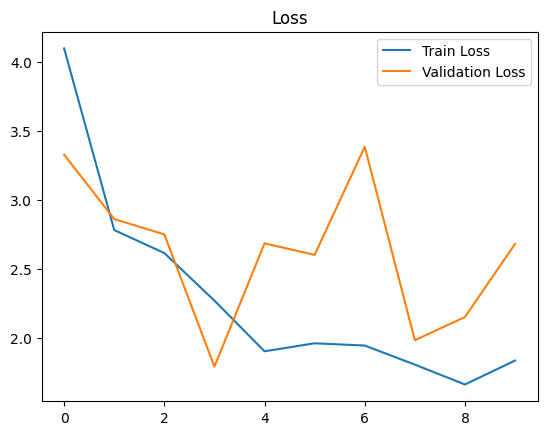

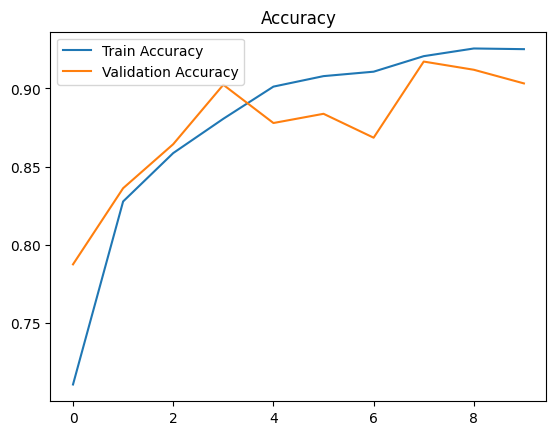

In [4]:
# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [6]:
model.save('../Models/InceptionResNetV2_model.h5')